In [8]:
# INPUT
tipo_data = 2

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import constants
from scipy import integrate
from scipy.interpolate import PchipInterpolator
import numpy.polynomial.chebyshev as cheb
import inspect
import time
import tkinter as tk  # or use pyautogui or wx

# physical constants
qe = constants.e
e0 = constants.epsilon_0
me = constants.electron_mass
pi = constants.pi

data_r, data_f = None, None

if tipo_data == 1:
    # DATA
    data_r = [79000.000000000, 79105.618652730, 79411.746271010, 79804.34397074,
            80361.494630300, 80932.759902080, 81767.825068030, 83034.92023057,
            84309.792901350, 85570.551796570, 86883.730806370, 87978.94642749,
            89364.223610450, 90866.539040390, 92695.998431090, 94901.78115401,
            97467.712165070, 100582.21739238, 103747.68314883, 107181.04633271,
            110985.32248069, 115228.77427054, 119792.14928000, 124766.09157501,
            131468.16429955, 139480.77872889, 162554.21325160, 194582.00033883,
            213922.45334866, 229094.99152826, 232560.84599884, 231051.62557358,
            230047.82991357, 229056.00831223, 228429.97232507, 228355.01505769,
            227902.34549348, 227888.02845391, 226962.64658551, 226386.21963094,
            224725.55288027, 223435.82154080, 222054.62640011, 221184.86944112,
            221333.89913294, 221962.01566660, 222863.22545614, 224015.02091592,
            224662.88906573, 225512.55873502, 225515.11165151, 225798.61401649,
            226047.97392415, 226597.85307559, 228084.23997013, 229699.07038122,
            232027.25195021, 234327.59911291, 235845.65094827, 237490.79290606,
            237899.30673014, 238685.57068924, 239183.08809513, 240025.64919801,
            241059.55912842, 242282.58966565, 243459.38937061, 244790.45214893,
            245998.95904195, 247367.13111675, 248844.05621529, 250416.19880538,
            251649.88395471, 253074.44871254, 253253.79578653, 253951.75453394,
            253635.95216831, 253917.61914093, 254764.19471767, 255718.38364254,
            258041.07946929, 259992.47921030, 262287.46943947, 264380.32471136,
            266004.50390234, 267767.41048959, 269486.19708011, 271292.62289033,
            272115.99619658, 273400.06324584, 273200.84074875, 273797.47358766,
            273846.17749573, 274423.53796131, 275161.09270722, 276066.10067367,
            276754.80491795, 277671.08129633, 279197.33346514, 280573.95917568,
            283664.63503469, 285982.79632696, 288543.95041258, 290835.15687695,
            290995.37314974, 292112.38509616, 291799.84885386, 292416.13368127,
            292910.28487335, 293744.99613769, 294294.01725763, 295156.69907123,
            296306.71590660, 297454.21013209, 301005.01894778, 303373.39188872,
            308560.60023812, 312065.89851796, 316350.58519469, 319860.32605518,
            322768.92793956, 325772.08436622, 330224.59433604, 333836.88808738,
            341008.44598434, 346032.92778273, 354636.59433975, 360799.52452939,
            377799.80528705, 388108.05038796]
    data_f = [
        1.00000000e-06, 1.00775194e+05, 2.01550388e+05, 3.02325581e+05,
        4.03100775e+05, 5.03875969e+05, 6.04651163e+05, 7.05426357e+05,
        8.06201550e+05, 9.06976744e+05, 1.00775194e+06, 1.10852713e+06,
        1.20930233e+06, 1.31007752e+06, 1.41085271e+06, 1.51162791e+06,
        1.61240310e+06, 1.71317829e+06, 1.81395349e+06, 1.91472868e+06,
        2.01550388e+06, 2.11627907e+06, 2.21705426e+06, 2.31782946e+06,
        2.41860465e+06, 2.51937984e+06, 2.62015504e+06, 2.72093023e+06,
        2.82170543e+06, 2.92248062e+06, 3.02325581e+06, 3.12403101e+06,
        3.22480620e+06, 3.32558140e+06, 3.42635659e+06, 3.52713178e+06,
        3.62790698e+06, 3.72868217e+06, 3.82945736e+06, 3.93023256e+06,
        4.03100775e+06, 4.13178295e+06, 4.23255814e+06, 4.33333333e+06,
        4.43410853e+06, 4.53488372e+06, 4.63565891e+06, 4.73643411e+06,
        4.83720930e+06, 4.93798450e+06, 5.03875969e+06, 5.13953488e+06,
        5.24031008e+06, 5.34108527e+06, 5.44186047e+06, 5.54263566e+06,
        5.64341085e+06, 5.74418605e+06, 5.84496124e+06, 5.94573643e+06,
        6.04651163e+06, 6.14728682e+06, 6.24806202e+06, 6.34883721e+06,
        6.44961240e+06, 6.55038760e+06, 6.65116279e+06, 6.75193798e+06,
        6.85271318e+06, 6.95348837e+06, 7.05426357e+06, 7.15503876e+06,
        7.25581395e+06, 7.35658915e+06, 7.45736434e+06, 7.55813953e+06,
        7.65891473e+06, 7.75968992e+06, 7.86046512e+06, 7.96124031e+06,
        8.06201550e+06, 8.16279070e+06, 8.26356589e+06, 8.36434109e+06,
        8.46511628e+06, 8.56589147e+06, 8.66666667e+06, 8.76744186e+06,
        8.86821705e+06, 8.96899225e+06, 9.06976744e+06, 9.17054264e+06,
        9.27131783e+06, 9.37209302e+06, 9.47286822e+06, 9.57364341e+06,
        9.67441860e+06, 9.77519380e+06, 9.87596899e+06, 9.97674419e+06,
        1.00775194e+07, 1.01782946e+07, 1.02790698e+07, 1.03798450e+07,
        1.04806202e+07, 1.05813953e+07, 1.06821705e+07, 1.07829457e+07,
        1.08837209e+07, 1.09844961e+07, 1.10852713e+07, 1.11860465e+07,
        1.12868217e+07, 1.13875969e+07, 1.14883721e+07, 1.15891473e+07,
        1.16899225e+07, 1.17906977e+07, 1.18914729e+07, 1.19922481e+07,
        1.20930233e+07, 1.21937984e+07, 1.22945736e+07, 1.23953488e+07,
        1.24961240e+07, 1.25968992e+07, 1.26976744e+07, 1.27984496e+07,
        1.28992248e+07, 1.30000000e+07
    ]
else:
    data_r =  [
    95400.0, 95400.8614198, 95403.44567922, 95407.75277824, 95413.21773619,
    95420.1500766, 95428.71672383, 95438.86485066, 95448.09817997, 95459.588202,
    95472.62779331, 95484.84702554, 95497.36298944, 95511.93296958, 95527.94872426,
    95539.39000699, 95553.78842614, 95569.95577398, 95588.97384333, 95612.01172858,
    95634.65445264, 95658.14163751, 95698.39111295, 95737.05777828, 95774.17310566,
    95811.61696187, 95886.40903745, 95944.61250528, 96001.29447244, 96093.11833517,
    96188.85909513, 96275.44660768, 96360.35795545, 96509.48526669, 96633.04657651,
    96750.9638694, 96958.76785428, 97234.21406549, 97454.7230178, 97662.47643687,
    98124.78926822, 98507.87508192, 98849.60344578, 99176.99609041, 99781.47389842,
    100229.72272793, 100656.30906772, 101217.10963024, 101759.92508257, 102267.45461767,
    102764.55997348, 103409.9823641, 103982.99080942, 104542.54683077, 105401.12594755,
    106347.54276918, 107165.06795625, 107946.6616642, 109923.85417472, 111429.348111,
    112759.4633751, 114916.51243712, 118545.05841789, 121118.75109752, 123437.55470857,
    131217.55067094, 137616.95415759, 142809.90841027, 147530.22877044, 154633.64117778,
    160185.49727173, 165382.06251351, 170720.15829915, 175956.50457147, 181012.32049828,
    185985.7027772, 192812.97869368, 198764.77861573, 204463.52813214, 210475.07493468,
    216721.50557074, 222665.96039599, 228523.54607807, 234259.39738288, 240010.42718185,
    245778.54504797, 251564.97685524, 256108.11608283, 261394.63923536, 266822.69803173,
    271600.03953026, 276543.68306265, 281743.64877826, 287073.01605895, 292270.37950182,
    297659.06049596, 303143.62146328, 308579.09199706, 314050.18192508, 319642.90219064,
    325315.58027309, 330845.15148037, 336524.18917902, 342297.25397252, 348067.66339479,
    353778.57645362, 359642.82280646, 365590.15834261, 371137.01309544, 376866.1117844,
    382759.61563605, 388754.18927143, 394301.86415236, 400207.35097272, 406234.2734108,
    412486.92915725, 418820.90379593, 425180.69921314, 431592.00975567, 438943.67003977,
    445948.94741153, 452894.92852002, 460578.76063261, 468781.89553388, 476532.2131154,
    484182.5425743, 495813.27746286, 506097.03470776, 515669.93517122, 524964.04131651
    ]

    data_f = [
    1.00000000e-06, 5.58139535e+04, 1.11627907e+05, 1.67441860e+05,
    2.23255814e+05, 2.79069767e+05, 3.34883721e+05, 3.90697674e+05,
    4.46511628e+05, 5.02325581e+05, 5.58139535e+05, 6.13953488e+05,
    6.69767442e+05, 7.25581395e+05, 7.81395349e+05, 8.37209302e+05,
    8.93023256e+05, 9.48837209e+05, 1.00465116e+06, 1.06046512e+06,
    1.11627907e+06, 1.17209302e+06, 1.22790698e+06, 1.28372093e+06,
    1.33953488e+06, 1.39534884e+06, 1.45116279e+06, 1.50697674e+06,
    1.56279070e+06, 1.61860465e+06, 1.67441860e+06, 1.73023256e+06,
    1.78604651e+06, 1.84186047e+06, 1.89767442e+06, 1.95348837e+06,
    2.00930233e+06, 2.06511628e+06, 2.12093023e+06, 2.17674419e+06,
    2.23255814e+06, 2.28837209e+06, 2.34418605e+06, 2.40000000e+06,
    2.45581395e+06, 2.51162791e+06, 2.56744186e+06, 2.62325581e+06,
    2.67906977e+06, 2.73488372e+06, 2.79069767e+06, 2.84651163e+06,
    2.90232558e+06, 2.95813953e+06, 3.01395349e+06, 3.06976744e+06,
    3.12558140e+06, 3.18139535e+06, 3.23720930e+06, 3.29302326e+06,
    3.34883721e+06, 3.40465116e+06, 3.46046512e+06, 3.51627907e+06,
    3.57209302e+06, 3.62790698e+06, 3.68372093e+06, 3.73953488e+06,
    3.79534884e+06, 3.85116279e+06, 3.90697674e+06, 3.96279070e+06,
    4.01860465e+06, 4.07441860e+06, 4.13023256e+06, 4.18604651e+06,
    4.24186047e+06, 4.29767442e+06, 4.35348837e+06, 4.40930233e+06,
    4.46511628e+06, 4.52093023e+06, 4.57674419e+06, 4.63255814e+06,
    4.68837209e+06, 4.74418605e+06, 4.80000000e+06, 4.85581395e+06,
    4.91162791e+06, 4.96744186e+06, 5.02325581e+06, 5.07906977e+06,
    5.13488372e+06, 5.19069767e+06, 5.24651163e+06, 5.30232558e+06,
    5.35813953e+06, 5.41395349e+06, 5.46976744e+06, 5.52558140e+06,
    5.58139535e+06, 5.63720930e+06, 5.69302326e+06, 5.74883721e+06,
    5.80465116e+06, 5.86046512e+06, 5.91627907e+06, 5.97209302e+06,
    6.02790698e+06, 6.08372093e+06, 6.13953488e+06, 6.19534884e+06,
    6.25116279e+06, 6.30697674e+06, 6.36279070e+06, 6.41860465e+06,
    6.47441860e+06, 6.53023256e+06, 6.58604651e+06, 6.64186047e+06,
    6.69767442e+06, 6.75348837e+06, 6.80930233e+06, 6.86511628e+06,
    6.92093023e+06, 6.97674419e+06, 7.03255814e+06, 7.08837209e+06,
    7.14418605e+06, 7.20000000e+06
    ]

data_r = np.array(data_r)/1e3 # Km
data_f = np.array(data_f)/1e6 # MHz
QP = {}

In [10]:
# FUNCTIONS

eps = 1e-6

def E_ionogram(f,r_bE,y_mE,f_c):
    return r_bE + 0.5*y_mE*(f/f_c)*np.log((f_c+eps+f)/(f_c+eps-f))

def delta_he(fk,zE,yE,fE):
    """
    E layer height contribution for fk < fE
    """
    return  zE-yE+(1/2)*(yE)*(fk/fE)*np.log(((fE+eps)+fk)/((fE+eps)-fk))

def fp_E_layer(rme, yme, fce):
    rbe = rme - yme
    r = np.linspace(rbe,rme,num=100)
    inside_sqrt = 1 - (((r-rme)/yme)**2) * ((rbe/r)**2)
    inside_sqrt[inside_sqrt<0] = 0
    fp = np.sqrt( (fce**2)*( inside_sqrt ) )
    return r,fp

def compute_ab(fc, rb, ym):
    """
    need f_ci, r_bi, y_mi
    """
    a = fc**2
    b = a*((rb/ym)**2)
    return a,b

In [11]:
# INPUT FOR E LAYER
if tipo_data == 1:
    fE = 3.023
else:
    fE = 3.4
# END INPUT

In [12]:
# FIND PARAMETERS OF QP0, aka, E  LAYER

index_fE = np.searchsorted(data_f, fE, side='right')
print(f'closest possible number to fE is {data_f[index_fE]}')
#fE = data_f[index]
QP['f_c0'] = data_f[index_fE]
QP['f_c0'] = fE
QP['QPs'] = 0

# remember that zE and yE belong to the plot in the space of plasma frequency vs real height, no frequency vs virtual height
E_data_f = data_f[data_f<=fE]
E_data_r = data_r[data_f<=fE]
QP['numt'] = len(E_data_f)

def find_Q0():
    data_zE = np.linspace(1.0,250.0,num=400)
    data_yE = np.linspace(1.0,200.0,num=400)
    process = {'error': 1e9, 'rm': -1, 'rb': -1, 'ym': -1}
    for ze in data_zE:
        for ye in data_yE:

            if ye > ze:
                continue

            P = delta_he(E_data_f,zE=ze,yE=ye,fE=fE)
            dif = E_data_r - P
            error_i = (np.sum(dif**2))/len(dif)

            if error_i<process['error']:
                process['error'] = error_i
                process['rm'], process['rb'], process['ym'] = (ze, ze-ye, ye)

    return process['rm'], process['rb'], process['ym']


QP['r_m0'], QP['r_b0'], QP['y_m0'] = find_Q0()
QP['a_0'], QP['b_0'] = compute_ab(fc = QP['f_c0'], rb = QP['r_b0'], ym = QP['y_m0'])

# once we've found suitable parameters for the fitting of the ionogram, we interpolate values to get the E layer in the plasma frequency profile
r_E, fp_E = fp_E_layer(rme=QP['r_m0'],yme=QP['y_m0'],fce=fE)

#interpolation with PchipInterpolator, it ensures monotonicity
pchip = PchipInterpolator(fp_E, r_E)
xnew = E_data_f   # Hz
ynew = pchip(xnew)   # meters

QP['plasma_frequency'] = xnew
QP['real_height']      = ynew
#end of interpolation

closest possible number to fE is 3.4046511600000002


In [13]:
# FUNCTIONS
import math

def ne_to_fp2(ne): # input: m^{-3} output: Hz^{2}
    return (qe**2/(e0*me)/(2*pi)**2) * ne

def fp2_to_ne(fp2): # input: Hz^{2} output: m^{-3}
    return ((2*pi)**2)*(e0*me)/(qe**2) * fp2

def get_ionogram(h,fp,range_f):
    """
    INPUT:
    - h: real heights
    - fp: plasma frequency
    - range_f: frequency range in which we are interested in
    IMPORTANT: `fp` and `range_f` should have the same units

    OUTPUT:
    - f : frequency range | same values as in `range_f`
    - hv: virtual heights | same units as in `h`
    """

    ne = fp2_to_ne(fp**2)

    # some modifications for numerical stability
    ne[0]=0.00
    epsilon = 1e-7
    range_f = range_f - epsilon
    # end of modifications

    if h[0]!=0:
        h  = np.append(0,h)
        ne = np.append(0,ne)

    n_elements = len(h)
    dif_h = h[1:len(h)] - h[0:len(h)-1]

    # arrays where we will save the integral results per frequency
    f  = np.array([])
    hv = np.array([])

    fp2 = ne_to_fp2(ne)
    max_possible_fp = max(fp2)

    for f_i in range_f:
        f_probe = f_i**2
        if f_probe<max_possible_fp:
            n2l = 1 - fp2[0]/f_probe

            integral = 0
            if n2l>0:
                sqrt_n2l = np.sqrt(n2l)
                for i in range(n_elements-1):
                    n2r = 1 - fp2[i+1]/f_probe
                    if n2r>0:
                        sqrt_n2r = np.sqrt(n2r)
                        integral += 2*dif_h[i]/(sqrt_n2l+sqrt_n2r)
                        n2l = n2r
                        sqrt_n2l=sqrt_n2r
                    else:
                        integral += 2*dif_h[i]*sqrt_n2r/(n2l-n2r)
                        break
            f  = np.append(f,f_i)       # Hz
            hv = np.append(hv,integral) # m
    return f, hv # (Hz,m)

def solve_for_r(f, a, b, rm, qp_type):
    f = f**2
    discriminant = (f - a) / b if qp_type == 'neg_to_pos' else -(f - a) / b
    if discriminant < 0: return -1, -1

    s = math.sqrt(discriminant)
    return rm / (1 - s), rm / (1 + s)

def get_real_height(frq, a, b, rm, h_ref, qp_type):
    r1, r2 = solve_for_r(frq, a, b, rm, qp_type)
    if r1 == -1 and r2 == -1: return -1
    return max(r1, r2) if qp_type == 'neg_to_pos' else min(r1, r2)

def y_der_negative(r,b,rm):
    return -2*b*rm*(1-rm/r)*(1/r**2)

def y_der_positive(r,b,rm):
    return 2*b*rm*(1-rm/r)*(1/r**2)

def y_negative(r,a,b,rm):
    return a-b*((1-rm/r)**2)

def y_positive(r,a,b,rm):
    return a+b*((1-rm/r)**2)

def find_rm(ri, a, ai1, bi1, rmi1, tipo):
    deriv = y_der_negative(ri,bi1,rmi1) if tipo == 'neg_to_pos' else y_der_positive(ri,bi1,rmi1)
    y_type = y_negative(ri,ai1,bi1,rmi1) if tipo == 'neg_to_pos' else y_positive(ri,ai1,bi1,rmi1)

    return (ri**2 * deriv) / (2 * (y_type - a) + ri * deriv)

def find_b(ri, a, ai1, bi1, rmi1, tipo):
    deriv = y_der_negative(ri,bi1,rmi1) if tipo == 'neg_to_pos' else y_der_positive(ri,bi1,rmi1)
    y_type = y_negative(ri,ai1,bi1,rmi1) if tipo == 'neg_to_pos' else y_positive(ri,ai1,bi1,rmi1)
    cte = 1.0 if tipo == 'neg_to_pos' else -1.0

    numerator = 2*(y_type - a) + ri*deriv
    denominator = 4*(y_type - a)
    return cte * (numerator**2) / denominator

def L2_ERROR(errors):
    return np.sqrt(np.sum(errors**2))/len(errors)


In [14]:

numt_min = 4
numt_max = 10

def get_qp(qp_number):
    # Remember that i is the current QP_i and i1 is the QP_{i-1} layer
    tam_without_grid = 1000

    # Set a lowerbound and upperbound depending on if it is a QP or anti-QP layer
    fc_lowerbound, fc_upperbound, qp_type = None, None, None
    if qp_number % 2 == 1:
        fc_lowerbound = QP['f_c'+str(qp_number-1)] - 2.0
        fc_upperbound = QP['f_c'+str(qp_number-1)] - eps
        qp_type        = 'neg_to_pos'
    else:
        fc_lowerbound = QP['plasma_frequency'][-1] + eps
        fc_upperbound = QP['plasma_frequency'][-1] + 2.0
        qp_type        = 'pos_to_neg'

    possible_fc = np.linspace(fc_lowerbound, fc_upperbound, num=tam_without_grid)
    numt = len(QP['plasma_frequency'])

    # Variable to store the best set of parameters based on error L2
    store = {'error': 1e12, 'a_1':-1, 'b_0':-1, 'r_m1':-1, 'data_f':np.array([]), 'data_r': np.array([])}

    for fi in possible_fc:
        # compute current QP parameters
        fi = fi * 1e6 # Hz
        ai = fi ** 2  # Hz^2
        prev_real = QP['real_height'][-1] * 1e3 # m
        rmi = find_rm(ri=prev_real, a=ai, ai1=QP['a_'+str(qp_number-1)] * 1e12, bi1=QP['b_'+str(qp_number-1)] * 1e12, rmi1=QP['r_m'+str(qp_number-1)] * 1e3, tipo=qp_type) # m
        bi  =  find_b(ri=prev_real, a=ai, ai1=QP['a_'+str(qp_number-1)] * 1e12, bi1=QP['b_'+str(qp_number-1)] * 1e12, rmi1=QP['r_m'+str(qp_number-1)] * 1e3, tipo=qp_type) # Hz^2

        # We want a minimum of 4 data points | We get the initial average error L2
        tmp_f, tmp_r = QP['plasma_frequency'] * 1e6, QP['real_height'] * 1e3

        # data to be added to the final reconstructed real height profile IF its error is the smallest
        i_data_r = np.array([])
        i_data_f = np.array([])

        for idx_numt in range(numt_min):
            if numt+idx_numt>=len(data_f): break

            frq = data_f[numt + idx_numt] * 1e6 # Hz
            rh_frq = get_real_height(frq, ai, bi, rmi, prev_real, qp_type = qp_type) # m | we might get -1 but this automatically throws the error to bigger numbers so nothing to worry
            prev_real = rh_frq

            tmp_f = np.append(tmp_f,frq)
            tmp_r = np.append(tmp_r,rh_frq)

            i_data_f = np.append(i_data_f, frq)
            i_data_r = np.append(i_data_r, rh_frq)

        fp_ans , hv_ans = get_ionogram(h = tmp_r/1e3,fp = tmp_f/1e6, range_f = data_f[:len(tmp_f)])

        # compute initial error L2
        original_vh = data_r[:len(fp_ans)]
        difference = abs(hv_ans - original_vh)
        errors = np.array([difference])
        L2_error = L2_ERROR(errors)

        # Explore further data points | we have just processed data_f[numt]

        # Set initial values
        prev_error = L2_error
        final_error = L2_error

        # While we don't increase the average L2 error we can continue appending data points
        for idx_numt in range(numt_min,numt_max):
            if numt+idx_numt>=len(data_f): break

            # Fetch a new frequency data point
            frq = data_f[numt + idx_numt] * 1e6                                      # Hz
            rh_frq = get_real_height(frq, ai, bi, rmi, prev_real, qp_type = qp_type) # m
            prev_real = rh_frq                                                       # m

            # Compute the new ionogram | fp_ans, hv_ans = Mhz, km
            fp_ans , hv_ans = get_ionogram(h = np.append(tmp_r/1e3,rh_frq/1e3),fp = np.append(tmp_f/1e6, frq/1e6), range_f = data_f[:numt+idx_numt+1])

            # compute initial error L2
            original_vh = data_r[:len(fp_ans)]
            difference = abs(hv_ans - original_vh)
            errors = np.array([difference])
            L2_error = L2_ERROR(errors)

            if L2_error <= prev_error:
                # If the previous calculation didn't increase the error we push the new values into our local arrays
                tmp_f = np.append(tmp_f,frq)    # Hz
                tmp_r = np.append(tmp_r,rh_frq) # m

                # If error didn't increase we store the new values for the global array in case this is the best scenario
                i_data_r = np.append(i_data_r,rh_frq)
                i_data_f = np.append(i_data_f,frq)

                # Set previous L2 error
                prev_error = L2_error
                final_error = L2_error
            else:
                break


        # If the error with the current f_c1 is lesser than the previous one, then we update
        if final_error < store['error']:
            store['error'] = final_error
            # change units because these go the original map QP[]
            store['a_'+str(qp_number)] = ai / 1e12
            store['b_'+str(qp_number)] = bi / 1e12
            store['r_m'+str(qp_number)] = rmi / 1e3
            store['data_r'] = i_data_r / 1e3
            store['data_f'] = i_data_f / 1e6


    # Test QP1 layer

    # Print some info
    print('--------------------------------------------------------------------------------------------------------------')
    print(f'QP NUMBER = {qp_number}')
    print('Error = ',store['error'])
    # Pass information stored to the final solution reconstruction
    QP['a_'+str(qp_number)]  = store['a_'+str(qp_number)]
    QP['f_c'+str(qp_number)] = np.sqrt(store['a_'+str(qp_number)])
    QP['b_'+str(qp_number)]  = store['b_'+str(qp_number)]
    QP['r_m'+str(qp_number)] = store['r_m'+str(qp_number)]
    QP['plasma_frequency']   = np.append(QP['plasma_frequency'],store['data_f'])
    QP['real_height']        = np.append(QP['real_height'], store['data_r'])

start_time = time.time()
for tmr in range(30):
    get_qp(qp_number=tmr+1)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for computing QP layers: {elapsed_time} seconds \n")

# Find the produced final ionogram
fp_ans , hv_ans = get_ionogram(h = QP['real_height'],fp = QP['plasma_frequency'], range_f = QP['plasma_frequency'])


--------------------------------------------------------------------------------------------------------------
QP NUMBER = 1
Error =  5.341271579889016
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 2
Error =  14.619993278511695
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 3
Error =  18.769187599367896
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 4
Error =  23.402376473506997
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 5
Error =  25.4150996137463
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 6
Error =  27.201531878209707
-------------------------------------------------------------------------------------

<ipython-input-13-e8b91016ec8e>:105: RuntimeWarning: divide by zero encountered in scalar divide
  return cte * (numerator**2) / denominator


--------------------------------------------------------------------------------------------------------------
QP NUMBER = 21
Error =  35.90592729507864
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 22
Error =  35.90592729507864
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 23
Error =  35.90592729507864
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 24
Error =  35.90592729507864
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 25
Error =  35.90592729507864
--------------------------------------------------------------------------------------------------------------
QP NUMBER = 26
Error =  35.90592729507864
----------------------------------------------------------------------------------

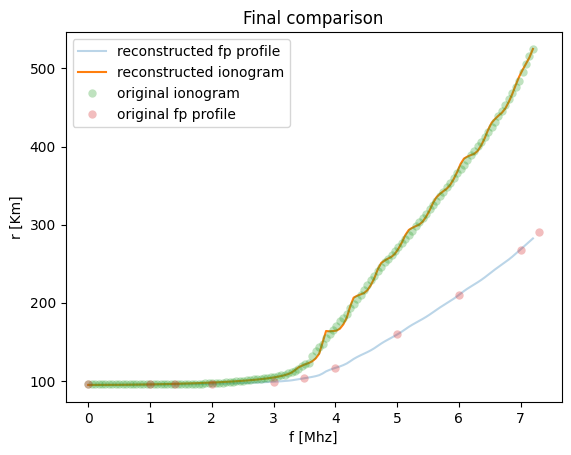

In [15]:
# Original plasma frequency profile data
ori_fp = np.array([0,     1,  1.4,   2,  3, 3.5,   4,   5,   6,   7,  7.3],dtype=np.float64) # MHz
ori_h  = np.array([95.4,  95.5,  95.6, 96, 99, 103, 117, 160, 210, 268,  290],dtype=np.float64) # KM

# Plot final comparison
plt.figure()
plt.title(f'Final comparison')
plt.xlabel('f [Mhz]')
plt.ylabel('r [Km]')
plt.plot(QP['plasma_frequency'],QP['real_height'],label='reconstructed fp profile', alpha = 0.3,mew=0, mec='none')
plt.plot(fp_ans,hv_ans,label='reconstructed ionogram',mew=0, mec='none')
len_interest = len(fp_ans)
plt.plot(data_f,data_r,'o',label='original ionogram', alpha = 0.3,mew=0, mec='none')
plt.plot(ori_fp,ori_h,'o',label='original fp profile', alpha = 0.3,mew=0, mec='none')
plt.legend()

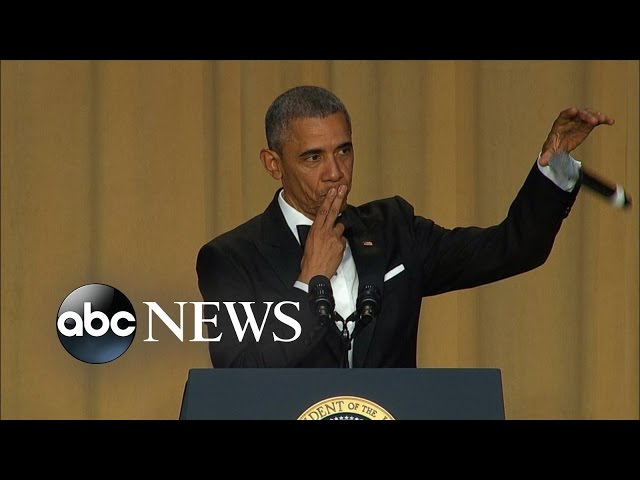